In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_url = "https://raw.githubusercontent.com/dthonon/pna_loup_suivi/main/data/"
# data_url = "/home/daniel-thonon/Code/pna_loup_suivi/data/"
# Lecture des départements
dept = pd.read_csv(
    data_url + "departements-region.csv",
    sep=";",
    header=0,
    names=[
        "Num_Département",
        "Département",
        "Région",
    ],
)
# Lecture des dommages aux animaux de rente
dommages = pd.read_csv(data_url + "dommages.csv", sep=";")
# Lecture des tirs létaux sur les loups
interventions = pd.read_csv(data_url + "protocole_intervention.csv", sep=";")
# Regroupement dans 1 dataframe
donnees_pna = pd.merge(dommages, interventions)

# Ajout des départements et régions
# dommages = pd.merge(dommages, dept, on="Département")
# interventions = pd.merge(interventions, dept, on="Département")
donnees_pna = pd.merge(donnees_pna, dept, on="Département")


ParserError: Too many columns specified: expected 3 and found 1

In [57]:
# Calcul des colonnes supplémentaires
donnees_pna.fillna(0, inplace=True)
donnees_pna["AP_TOTAL"] = donnees_pna.apply(
    lambda row: row.AP_TDS + row.AP_TDR + row.AP_TP + row.AP_TPR, axis=1
)
donnees_pna["Loups_tués"] = donnees_pna.apply(
    lambda row: row.Loups_tués_légal + row.Loups_tués_illégal, axis=1
)
donnees_pna["Ratio_loups_tués_dommages"] = donnees_pna["Loups_tués"]/donnees_pna["Nb_animaux_tués"]
donnees_pna


,Année,Département,Nb_dossiers,Nb_animaux_tués,Unnamed: 4,Unnamed: 5,AP_TDS,AP_TDR,AP_TP,AP_TPR,Loups_tués_légal,Loups_tués_illégal,Loups_tués_accident,Num_Département,Région,AP_TOTAL,Loups_tués,Ratio_loups_tués_dommages
0,2016,Alpes-de-Haute-Provence,477,1272,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,04,Provence-Alpes-Côte d'Azur,0.0,4.0,0.003145
1,2017,Alpes-de-Haute-Provence,556,1610,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,04,Provence-Alpes-Côte d'Azur,0.0,1.0,0.000621
2,2018,Alpes-de-Haute-Provence,531,1769,0.0,0.0,310.0,41.0,0.0,5.0,9.0,0.0,6.0,04,Provence-Alpes-Côte d'Azur,356.0,9.0,0.005088
3,2019,Alpes-de-Haute-Provence,649,1942,0.0,0.0,432.0,57.0,3.0,0.0,12.0,2.0,1.0,04,Provence-Alpes-Côte d'Azur,492.0,14.0,0.007209
4,2020,Alpes-de-Haute-Provence,534,1677,0.0,0.0,491.0,88.0,0.0,1.0,9.0,4.0,0.0,04,Provence-Alpes-Côte d'Azur,580.0,13.0,0.007752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023,Puy-de-Dôme,4,51,3.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63,Auvergne-Rhône-Alpes,0.0,0.0,0.000000
203,2023,Rhône,7,36,6.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69,Auvergne-Rhône-Alpes,0.0,0.0,0.000000
204,2023,Territoire de Belfort,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90,Bourgogne-Franche-Comté,0.0,0.0,0.000000
205,2023,Vienne,6,52,5.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86,Nouvelle-Aquitaine,0.0,0.0,0.000000


In [58]:
interventions_dept = pd.merge(interventions, dept, on="Département")
interventions_y = interventions_dept.groupby(["Année"])
print(interventions_y.sum(numeric_only=True))

       AP_TDS  AP_TDR  AP_TP  AP_TPR  Loups_tués_légal  Loups_tués_illégal  \
Année                                                                        
2012      0.0     0.0    0.0     0.0               3.0                 0.0   
2013      0.0     0.0    0.0     0.0               4.0                 0.0   
2014      0.0     0.0    0.0     0.0               8.0                 0.0   
2015      0.0     0.0    0.0     0.0              19.0                 0.0   
2016      0.0     0.0    0.0     0.0              33.0                 0.0   
2017      0.0     0.0    0.0     0.0              34.0                 1.0   
2018   1469.0   161.0    5.0    15.0              47.0                 4.0   
2019   1609.0   210.0   12.0     2.0              94.0                 5.0   
2020   2084.0   319.0    7.0     2.0              97.0                 8.0   
2021   2188.0   231.0    0.0     0.0             100.0                 6.0   
2022   2436.0   335.0    0.0     0.0             162.0          

In [59]:
dommages_dept = pd.merge(dommages, dept, on="Département")
dommages_y = dommages_dept.groupby(["Année"])
dommages_y.sum(numeric_only=True)

,Nb_dossiers,Nb_animaux_tués,Unnamed: 4,Unnamed: 5
Année,,,,
2016,2756,9932,0.0,0.0
2017,3228,11993,0.0,0.0
2018,3088,10672,0.0,0.0
2019,3651,12094,0.0,0.0
2020,3670,11746,0.0,0.0
2021,3537,10826,0.0,0.0
2022,3690,11527,0.0,0.0
2023,3846,10408,3114.0,8590.0


In [60]:
# interventions_y = interventions.groupby(["Année"])
# interventions_y.sum(numeric_only=True)

In [61]:
donnees_pna_y = donnees_pna.groupby(["Année"])
donnees_pna_y.sum(numeric_only=True)

,Nb_dossiers,Nb_animaux_tués,Unnamed: 4,Unnamed: 5,AP_TDS,AP_TDR,AP_TP,AP_TPR,Loups_tués_légal,Loups_tués_illégal,Loups_tués_accident,AP_TOTAL,Loups_tués,Ratio_loups_tués_dommages
Année,,,,,,,,,,,,,,
2016,2465,9040,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,5.0,0.0,33.0,0.027318
2017,2551,9586,0.0,0.0,0.0,0.0,0.0,0.0,34.0,1.0,1.0,0.0,35.0,0.027280
2018,3061,10589,0.0,0.0,1469.0,161.0,5.0,15.0,47.0,4.0,27.0,1650.0,51.0,0.039239
2019,3559,11793,0.0,0.0,1609.0,210.0,12.0,2.0,94.0,5.0,20.0,1833.0,99.0,0.131948
2020,3517,11364,0.0,0.0,2084.0,319.0,7.0,2.0,97.0,8.0,0.0,2412.0,105.0,0.117261
2021,3409,10462,0.0,0.0,2188.0,231.0,0.0,0.0,100.0,6.0,0.0,2419.0,106.0,0.094531
2022,3644,11435,0.0,0.0,2436.0,335.0,0.0,0.0,162.0,6.0,0.0,2771.0,168.0,0.162888
2023,3844,10407,3112.0,8589.0,1380.0,65.0,0.0,0.0,198.0,9.0,0.0,1445.0,207.0,inf


In [62]:
# Apply the default theme
sns.set_theme()

In [63]:
dept_max = (
    "Num_Département == '06' or Num_Département == '04' or Num_Département == '05' or Num_Département == '83'"
    + "or Num_Département == '26' or Num_Département == '38' or Num_Département == '73' or Num_Département == '74'"
)
donnees_pna_max = donnees_pna.query(dept_max)


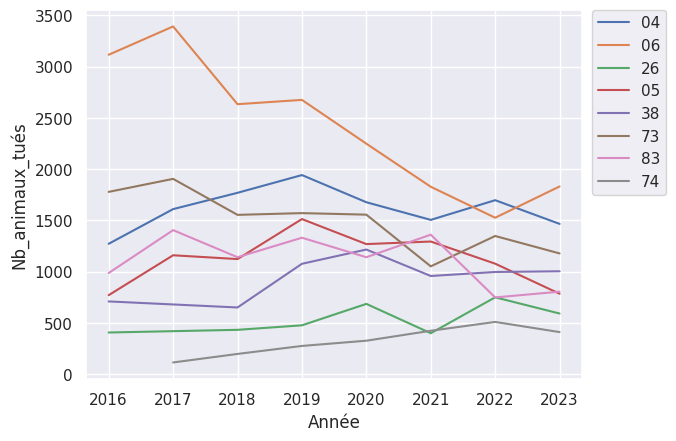

In [64]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Nb_animaux_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

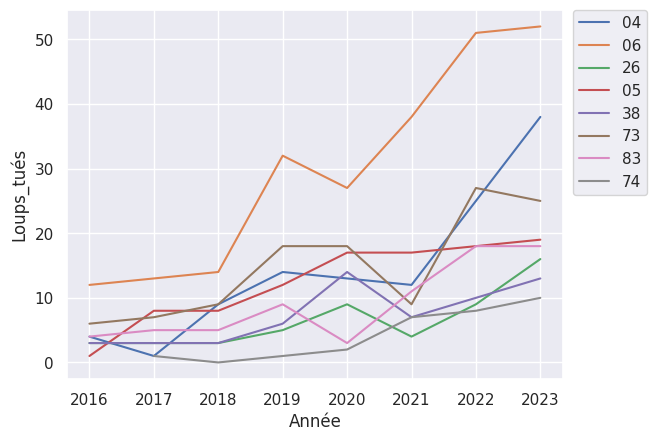

In [65]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Loups_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

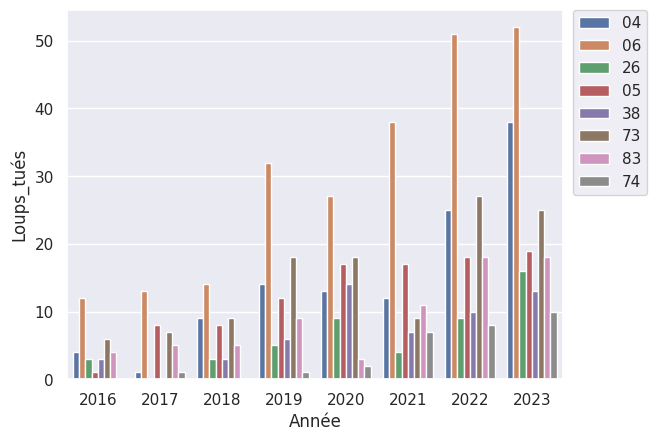

In [66]:
sns.barplot(data=donnees_pna_max, x="Année", y="Loups_tués", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

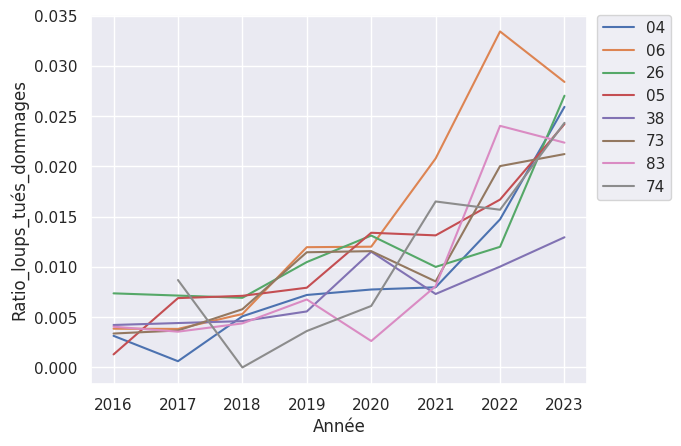

In [67]:
sns.lineplot(data=donnees_pna_max, x="Année", y="Ratio_loups_tués_dommages", hue="Num_Département");
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

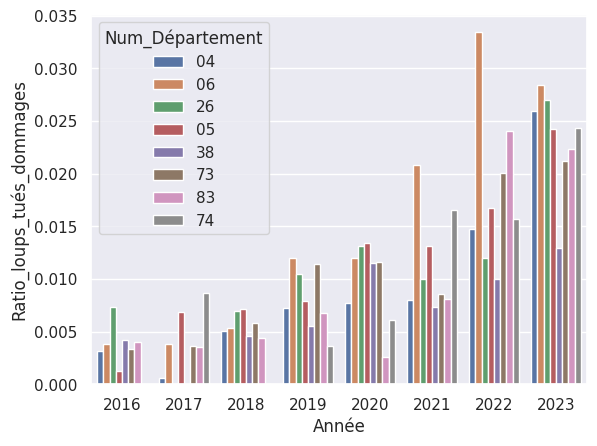

In [68]:
sns.barplot(data=donnees_pna_max, x="Année", y="Ratio_loups_tués_dommages", hue="Num_Département");

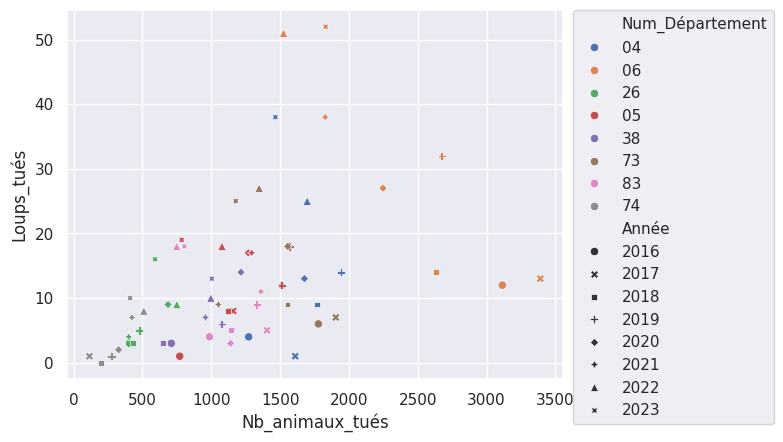

In [69]:
sns.scatterplot(
    data=donnees_pna_max,
    x="Nb_animaux_tués",
    y="Loups_tués",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

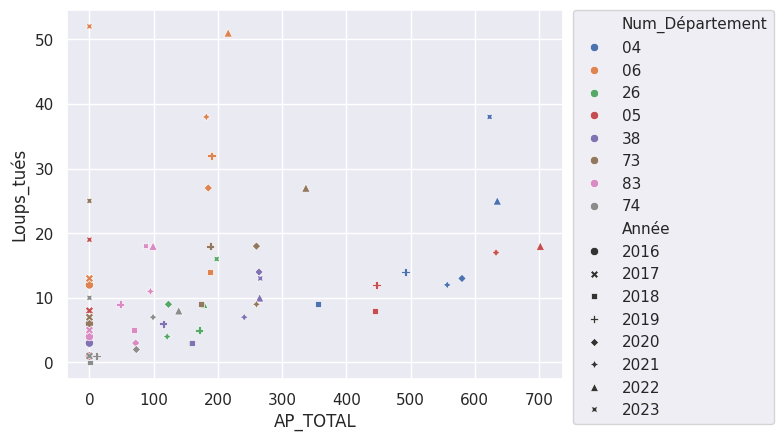

In [70]:
sns.scatterplot(
    data=donnees_pna_max,
    x="AP_TOTAL",
    y="Loups_tués",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

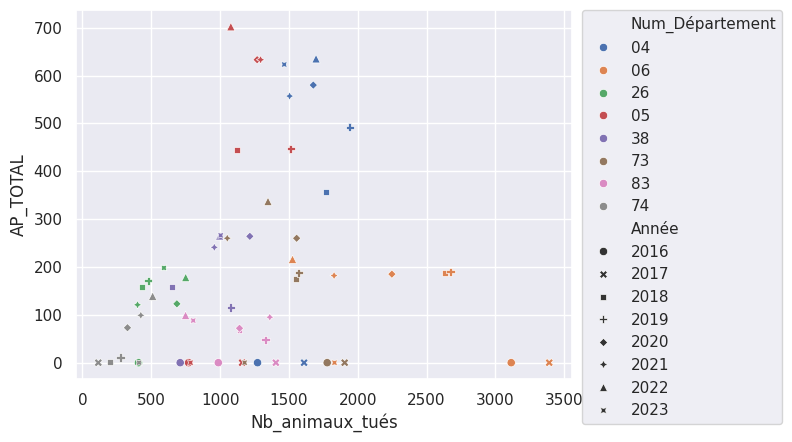

In [71]:
sns.scatterplot(
    data=donnees_pna_max,
    x="Nb_animaux_tués",
    y="AP_TOTAL",
    hue="Num_Département",
    style="Année",
    palette="deep",
);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);